In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub # can pip install

In [15]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 220 images belonging to 2 classes.


In [16]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [17]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 110 images belonging to 2 classes.


In [18]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

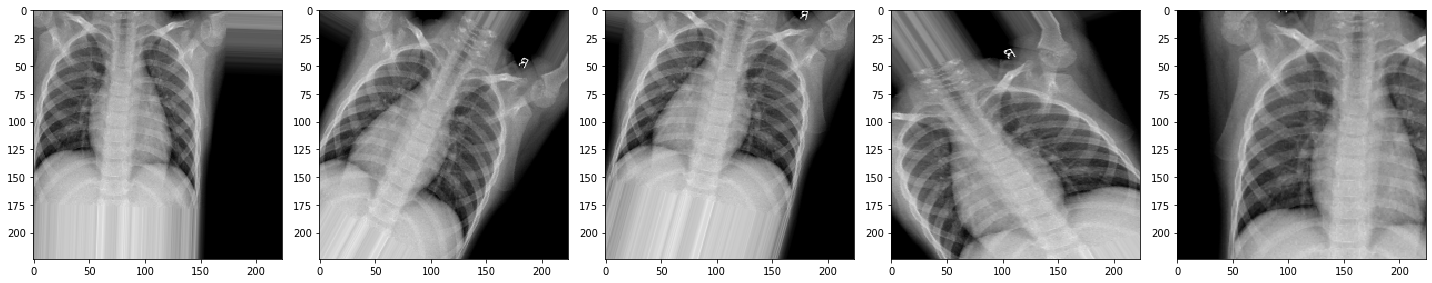

In [19]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [20]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input

In [21]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [22]:
mobile_net.trainable = False

In [23]:
model = tf.keras.models.Sequential([
    mobile_net,
    tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
    ])

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit_generator(
    training_set ,
    epochs=50,
    validation_data=test_set
    )

Epoch 1/50
7/7 [==============================] - 35s 4s/step - loss: 0.6563 - accuracy: 0.6520 - val_loss: 0.5825 - val_accuracy: 0.7545
Epoch 2/50
7/7 [==============================] - 27s 4s/step - loss: 0.5760 - accuracy: 0.7107 - val_loss: 0.5878 - val_accuracy: 0.6273
Epoch 3/50
7/7 [==============================] - 23s 3s/step - loss: 0.4066 - accuracy: 0.8797 - val_loss: 0.5227 - val_accuracy: 0.7000
Epoch 4/50
7/7 [==============================] - 24s 4s/step - loss: 0.4065 - accuracy: 0.8332 - val_loss: 0.4506 - val_accuracy: 0.8364
Epoch 5/50
7/7 [==============================] - 25s 4s/step - loss: 0.3173 - accuracy: 0.9008 - val_loss: 0.5252 - val_accuracy: 0.7000
Epoch 6/50
7/7 [==============================] - 27s 4s/step - loss: 0.2987 - accuracy: 0.9014 - val_loss: 0.4366 - val_accuracy: 0.7818
Epoch 7/50
7/7 [==============================] - 25s 4s/step - loss: 0.3062 - accuracy: 0.9043 - val_loss: 0.4216 - val_accuracy: 0.7909
Epoch 8/50
7/7 [==================

In [26]:
#save model
from tensorflow.keras.models import load_model
model.save('pneumonia_model.h5')

### Single Image Pred

In [16]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test/4.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# result = np.argmin(result)

In [17]:
result

array([[0.9686771]], dtype=float32)

In [18]:
result[0][0]

0.9686771

In [19]:
if result[0][0]>=0.5:
    print("The image classified Pneumonia ")
else:
    print("The image classified Normal")

The image classified Pneumonia 


### Multiple Image Pred

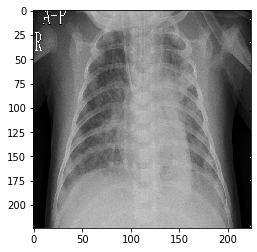

The image classified Pneumonia 


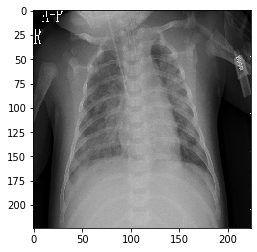

The image classified Pneumonia 


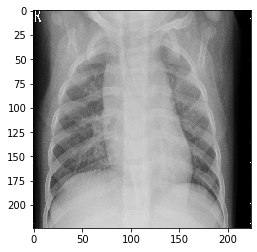

The image classified Pneumonia 


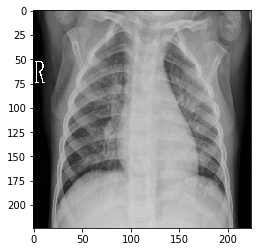

The image classified Normal


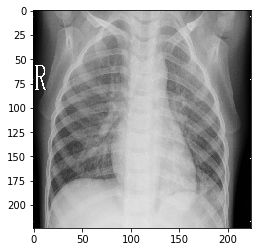

The image classified Pneumonia 


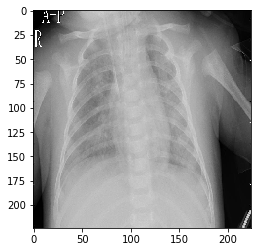

The image classified Pneumonia 


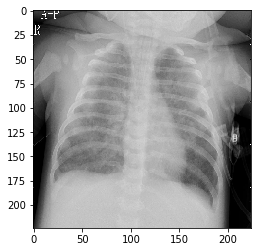

The image classified Pneumonia 


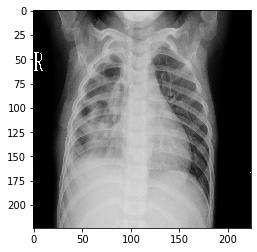

The image classified Pneumonia 


In [20]:
dir_path = 'test/pn'

for i in os.listdir(dir_path):
    test_image = image.load_img(dir_path+'/'+i, target_size = (224,224))
    plt.imshow(test_image)
    plt.show()
    
    test_image = image.img_to_array(test_image)
    test_image=test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    
    if result[0][0]>=0.5:
        print("The image classified Pneumonia ")
    else:
        print("The image classified Normal")
    
    
    
    